In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinay7410
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


100%|██████████| 163M/163M [00:00<00:00, 1.10GB/s]

In [3]:
!ls

face-mask-dataset  sample_data


In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
with_mask_files=os.listdir('/content/face-mask-dataset/data/with_mask')
print(with_mask_files[:])
print(with_mask_files[-5:])


['with_mask_3696.jpg', 'with_mask_2374.jpg', 'with_mask_3256.jpg', 'with_mask_3437.jpg', 'with_mask_1189.jpg', 'with_mask_793.jpg', 'with_mask_2065.jpg', 'with_mask_3028.jpg', 'with_mask_187.jpg', 'with_mask_2608.jpg', 'with_mask_2401.jpg', 'with_mask_2221.jpg', 'with_mask_2748.jpg', 'with_mask_295.jpg', 'with_mask_28.jpg', 'with_mask_1238.jpg', 'with_mask_1707.jpg', 'with_mask_1598.jpg', 'with_mask_25.jpg', 'with_mask_3387.jpg', 'with_mask_3292.jpg', 'with_mask_2672.jpg', 'with_mask_731.jpg', 'with_mask_2247.jpg', 'with_mask_3668.jpg', 'with_mask_1529.jpg', 'with_mask_2719.jpg', 'with_mask_2830.jpg', 'with_mask_3534.jpg', 'with_mask_3338.jpg', 'with_mask_2476.jpg', 'with_mask_2023.jpg', 'with_mask_3543.jpg', 'with_mask_1329.jpg', 'with_mask_1978.jpg', 'with_mask_3301.jpg', 'with_mask_1820.jpg', 'with_mask_165.jpg', 'with_mask_2377.jpg', 'with_mask_87.jpg', 'with_mask_73.jpg', 'with_mask_752.jpg', 'with_mask_3647.jpg', 'with_mask_2053.jpg', 'with_mask_1613.jpg', 'with_mask_145.jpg', 'w

In [6]:
without_mask_files=os.listdir('/content/face-mask-dataset/data/without_mask')
print(without_mask_files[:])
print(without_mask_files[-5:])


['without_mask_3482.jpg', 'without_mask_2137.jpg', 'without_mask_2635.jpg', 'without_mask_3466.jpg', 'without_mask_290.jpg', 'without_mask_2430.jpg', 'without_mask_3575.jpg', 'without_mask_1936.jpg', 'without_mask_2846.jpg', 'without_mask_341.jpg', 'without_mask_2797.jpg', 'without_mask_3344.jpg', 'without_mask_2646.jpg', 'without_mask_2026.jpg', 'without_mask_1805.jpg', 'without_mask_2496.jpg', 'without_mask_2987.jpg', 'without_mask_312.jpg', 'without_mask_2481.jpg', 'without_mask_527.jpg', 'without_mask_1345.jpg', 'without_mask_2202.jpg', 'without_mask_2244.jpg', 'without_mask_3699.jpg', 'without_mask_1306.jpg', 'without_mask_2603.jpg', 'without_mask_777.jpg', 'without_mask_3484.jpg', 'without_mask_3117.jpg', 'without_mask_1155.jpg', 'without_mask_3726.jpg', 'without_mask_3315.jpg', 'without_mask_2093.jpg', 'without_mask_2463.jpg', 'without_mask_1557.jpg', 'without_mask_94.jpg', 'without_mask_2955.jpg', 'without_mask_1584.jpg', 'without_mask_3564.jpg', 'without_mask_2717.jpg', 'witho

In [7]:
print("Number of the images with mask :",len(with_mask_files))
print("Number of the images without mask :",len(without_mask_files))

Number of the images with mask : 3725
Number of the images without mask : 3828


In [8]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [9]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


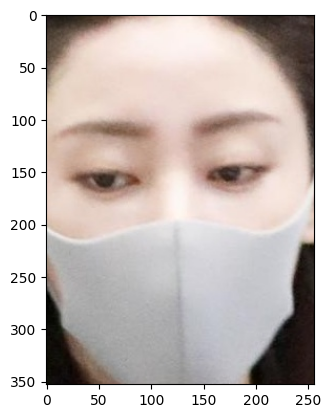

In [11]:
# displaying the images with mask
img=mpimg.imread("/content/face-mask-dataset/data/with_mask/with_mask_1263.jpg")
imgplot=plt.imshow(img)
plt.show()

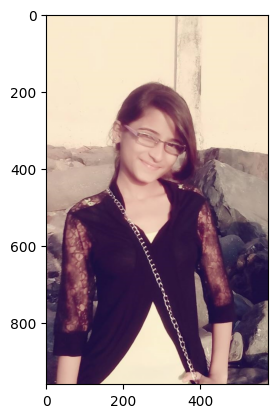

In [12]:
# displaying the image without mask
img=mpimg.imread("/content/face-mask-dataset/data/without_mask/without_mask_777.jpg")
imgplot=plt.imshow(img)
plt.show()

In [13]:
# image preproecings
with_mask_path="/content/face-mask-dataset/data/with_mask/"
data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  # image.save(with_mask_path+img_file)
  image=np.array(image)
  data.append(image)

without_mask_path="/content/face-mask-dataset/data/without_mask/"


for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  # image.save(with_mask_path+img_file)
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
len(data)


7553

array([[[184, 179, 150],
        [185, 180, 151],
        [185, 180, 152],
        ...,
        [177, 179, 158],
        [180, 182, 161],
        [184, 186, 167]],

       [[184, 180, 153],
        [184, 180, 153],
        [184, 181, 154],
        ...,
        [188, 191, 171],
        [187, 190, 172],
        [185, 188, 169]],

       [[188, 187, 163],
        [188, 187, 163],
        [189, 187, 163],
        ...,
        [193, 198, 181],
        [191, 195, 180],
        [189, 193, 178]],

       ...,

       [[ 15,  22,  30],
        [ 15,  22,  30],
        [ 15,  22,  30],
        ...,
        [ 24,  31,  37],
        [ 27,  34,  40],
        [ 26,  33,  39]],

       [[ 19,  26,  34],
        [ 19,  26,  34],
        [ 19,  26,  34],
        ...,
        [ 25,  32,  39],
        [ 25,  32,  39],
        [ 26,  33,  39]],

       [[ 20,  27,  35],
        [ 20,  27,  35],
        [ 21,  28,  36],
        ...,
        [ 26,  33,  41],
        [ 22,  29,  37],
        [ 25,  32,  40]]], dtype=uint8)
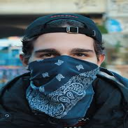

In [15]:
data[0]

In [16]:
# type[data]
data[0].shape

(128, 128, 3)

In [17]:
X=np.array(data)
Y=np.array(labels)

In [18]:
X.shape

(7553, 128, 128, 3)

In [19]:
Y.shape

(7553,)

In [20]:
# train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [21]:
print(X.shape,X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
# scalint he images
X_train=X_train/255.0
X_test=X_test/255.0

In [23]:
X_train[0]

array([[[0.05098039, 0.03137255, 0.01568627],
        [0.05098039, 0.02745098, 0.01176471],
        [0.05098039, 0.01960784, 0.00784314],
        ...,
        [0.17647059, 0.15686275, 0.14117647],
        [0.17647059, 0.15686275, 0.13333333],
        [0.17254902, 0.15294118, 0.12941176]],

       [[0.0745098 , 0.04313725, 0.03137255],
        [0.0745098 , 0.04313725, 0.02745098],
        [0.0745098 , 0.04705882, 0.02352941],
        ...,
        [0.19215686, 0.17254902, 0.15294118],
        [0.21960784, 0.2       , 0.18039216],
        [0.23137255, 0.21568627, 0.19215686]],

       [[0.05882353, 0.02352941, 0.00392157],
        [0.06666667, 0.02745098, 0.01176471],
        [0.07843137, 0.03529412, 0.01960784],
        ...,
        [0.19607843, 0.16470588, 0.15294118],
        [0.23137255, 0.20392157, 0.18431373],
        [0.25098039, 0.22352941, 0.2       ]],

       ...,

       [[0.89411765, 0.88627451, 0.89019608],
        [0.81176471, 0.80392157, 0.80784314],
        [0.6745098 , 0

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout


In [ ]:

# num_classes = 2  # jut 1 output neuron for binary classification

# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
# model.add(MaxPooling2D((2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(BatchNormalization())

# model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))   # binary classification

In [25]:
pip install -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [26]:
import kerastuner as kt

/tmp/ipython-input-1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [27]:
import keras
# from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import keras_tuner as kt

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Model builder with GAP
def build_model(hp, num_classes=2):
    model = Sequential()
    counter = 0

    for i in range(hp.Int('conv_layers', min_value=1, max_value=5)):
        if counter == 0:
            model.add(Conv2D(
                hp.Int(f'conv_{i}_units', min_value=32, max_value=128, step=16),
                (3, 3), activation='relu', input_shape=(128, 128, 3)
            ))
            model.add(MaxPooling2D((2, 2)))
            model.add(BatchNormalization())
        else:
            model.add(Conv2D(
                hp.Int(f'conv_{i}_units', min_value=32, max_value=128, step=16),
                (3, 3), activation='relu'
            ))
            model.add(MaxPooling2D((2, 2)))
            model.add(BatchNormalization())

        counter += 1

    # Use GAP instead of Flatten
    model.add(GlobalAveragePooling2D())

    # Dense + Dropout
    model.add(Dense(
        units=hp.Int("dense_units", min_value=32, max_value=256, step=32),
        activation="relu"
    ))

    model.add(Dropout(
        rate=hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1)
    ))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [28]:
tuner = kt.RandomSearch(
    lambda hp: build_model(hp, num_classes=2),   # pass function, not call
    objective='val_accuracy',
    max_trials=5,
    directory='project',
    project_name='mask_tuning'
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
tuner.search(X_train,Y_train,epochs=3,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 01m 02s]
val_accuracy: 0.955658495426178

Best val_accuracy So Far: 0.955658495426178
Total elapsed time: 00h 03m 39s


In [30]:
model=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

# Train with callbacks
history = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=15,              # you can set higher, e.g., 15–20
    validation_data=(X_test, Y_test),
    initial_epoch=4,        # continues after tuner
    callbacks=[early_stop, reduce_lr, checkpoint]
)


Epoch 5/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9438 - loss: 0.1425

189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.9438 - loss: 0.1424 - val_accuracy: 0.9643 - val_loss: 0.0860 - learning_rate: 0.0010
Epoch 6/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9657 - loss: 0.0893 - val_accuracy: 0.9616 - val_loss: 0.1070 - learning_rate: 0.0010
Epoch 7/15
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9782 - loss: 0.0620

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9782 - loss: 0.0620 - val_accuracy: 0.9662 - val_loss: 0.1063 - learning_rate: 5.0000e-04


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 112)    │        96,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 112)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 112)      │           448 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        64,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 160)            │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 940,664 (3.59 MB)

 Trainable params: 313,266 (1.20 MB)

 Non-trainable params: 864 (3.38 KB)

 Optimizer params: 626,534 (2.39 MB)

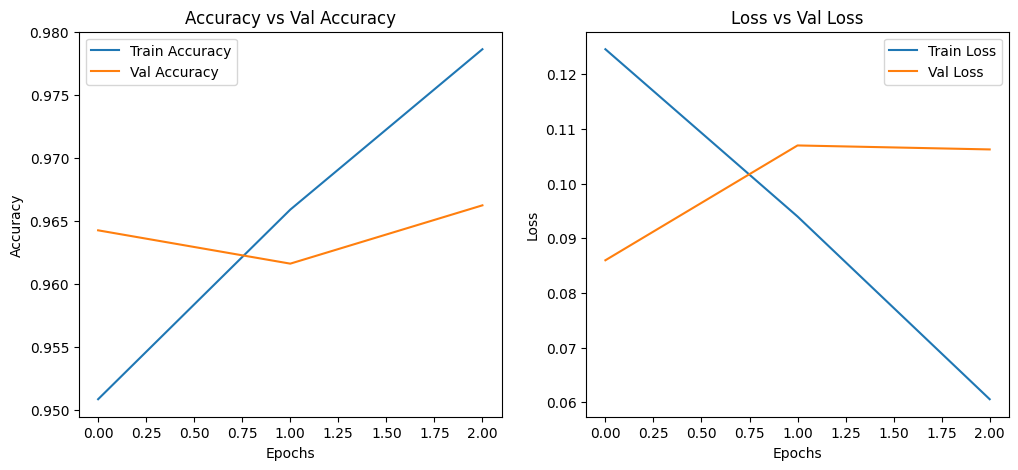

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss & Validation Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print(f"✅ Model Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


48/48 - 1s - 11ms/step - accuracy: 0.9643 - loss: 0.0860
✅ Model Test Accuracy: 96.43%
Test Loss: 0.0860


In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path of the image you want to test
img_path ="/content/istockphoto-1361217779-612x612.jpg"
# Load image and preprocess
img = image.load_img(img_path, target_size=(128,128))   # resize same as training
img_array = image.img_to_array(img) / 255.0             # normalize
img_array = np.expand_dims(img_array, axis=0)           # add batch dimension

# Predict
prediction = model.predict(img_array)

confidence = float(prediction[0][0])  # extract probability

if confidence > 0.5:
    print(f"Prediction: Without Mask 😷❌ | Confidence: {confidence*100:.2f}%")
else:
    print(f"Prediction: With Mask 😷✅ | Confidence: {(1-confidence)*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: With Mask 😷✅ | Confidence: 99.08%


In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# training the neural network
# history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8006 - loss: 4.7656 - val_accuracy: 0.5240 - val_loss: 6.7352
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8979 - loss: 0.8741 - val_accuracy: 0.6694 - val_loss: 2.0195
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9420 - loss: 0.2489 - val_accuracy: 0.8579 - val_loss: 1.3214
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9430 - loss: 0.2348 - val_accuracy: 0.9008 - val_loss: 0.5624
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9523 - loss: 0.2318 - val_accuracy: 0.9107 - val_loss: 0.5708


In [ ]:
# loss, accuracy = model.evaluate(X_test, Y_test)
# # print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9221 - loss: 0.4122
Test Accuracy = 0.9232296347618103


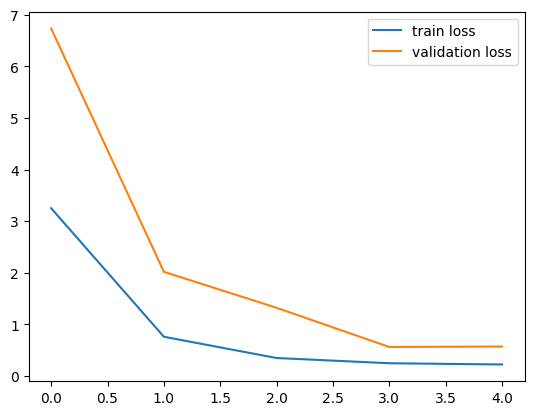

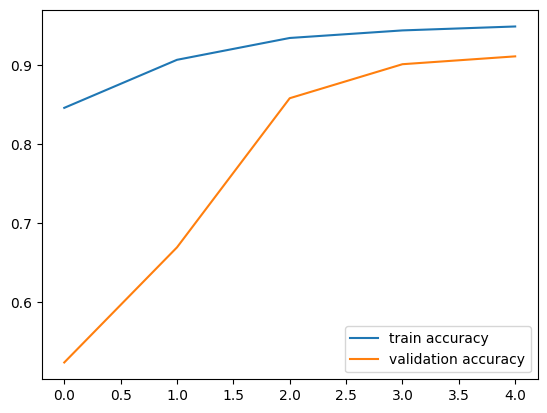

In [ ]:
# h = history

# # plot the loss value
# plt.plot(h.history['loss'], label='train loss')
# plt.plot(h.history['val_loss'], label='validation loss')
# plt.legend()
# plt.show()

# # plot the accuracy value
# plt.plot(h.history['accuracy'], label='train accuracy')
# plt.plot(h.history['val_accuracy'], label='validation accuracy')
# plt.legend()
# plt.show()

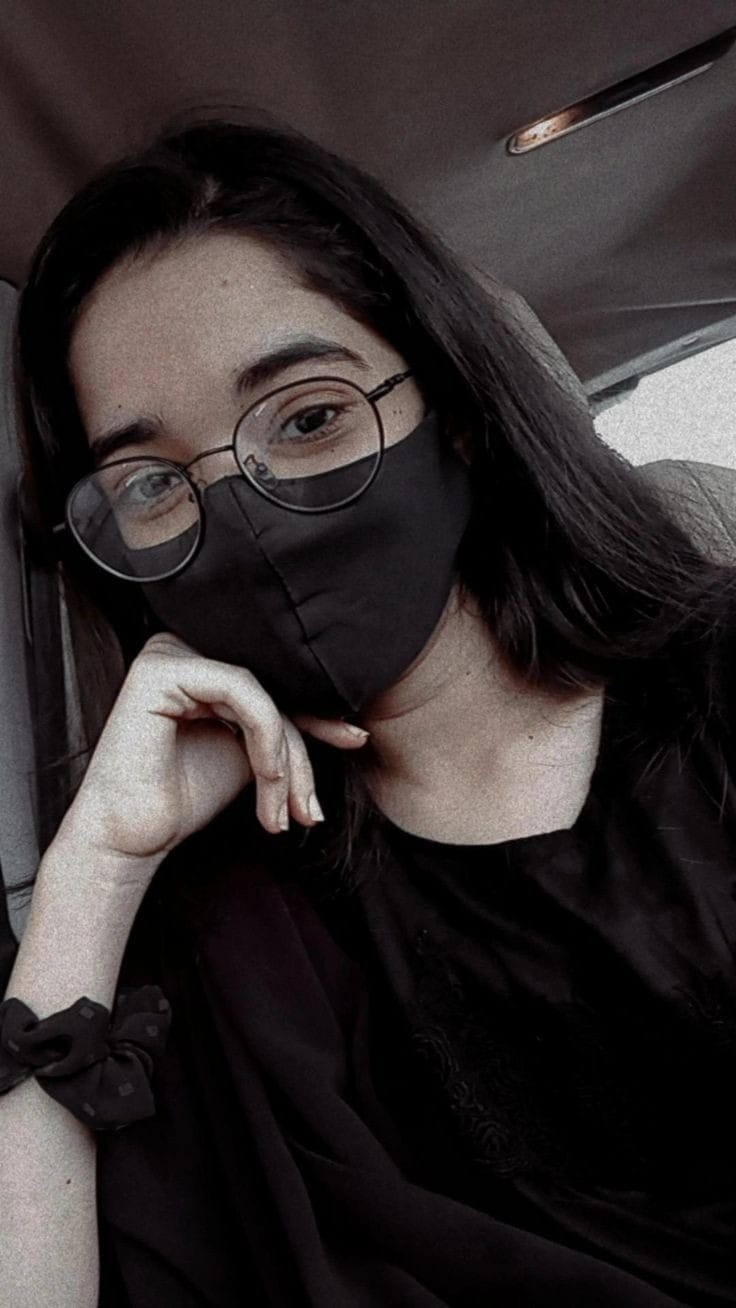

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
Raw prediction: [[0.0649677 0.9350323]]
Predicted class index: 1
Confidence: 93.50%
The person in the image is wearing a mask (93.50% confidence)


In [ ]:
# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow  # for displaying image in Colab

# # Load image
# input_image_path = '/content/Attitude-Mask-Girl-Dp.jpg'   # ✅ no need to use input()
# input_image = cv2.imread(input_image_path)

# cv2_imshow(input_image)

# # Preprocess
# input_image_resized = cv2.resize(input_image, (128,128))
# input_image_scaled = input_image_resized / 255.0
# input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# # Prediction
# input_prediction = model.predict(input_image_reshaped)
# print("Raw prediction:", input_prediction)

# # Get predicted class and confidence
# input_pred_label = np.argmax(input_prediction)   # class index
# confidence = np.max(input_prediction) * 100      # percentage

# print("Predicted class index:", input_pred_label)
# print(f"Confidence: {confidence:.2f}%")

# # Output result
# if input_pred_label == 1:
#     print(f'The person in the image is wearing a mask ({confidence:.2f}% confidence)')
# else:
#     print(f'The person in the image is not wearing a mask ({confidence:.2f}% confidence)')
